In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset containing product attributes
df = pd.read_csv('merge_product4.csv')


In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,product_id,brand,product_title,actual_price,special_price,average_rating,total_ratings,category,sub_category,product_image,extra_image,details,description,discount,url
0,0,0,WATG58TSDZXP57XZ,hmte,Day&Date Series Analog Watch - For Women HM-6742,999,299,4.1,10172.0,Watches,"['Home', 'Watches', 'Wrist Watches', 'hmte Wri...",https://rukminim2.flixcart.com/image/832/832/x...,['https://rukminim2.flixcart.com/image/128/128...,"['Yes', 'Analog', 'HM-6742', 'Day&Date Series'...","Catering to men and women, Hmte represents sop...",70,https://www.flipkart.com/hmte-day-date-series-...
1,1,1,WATG9AF2YKDAPUZ4,TIMEWEAR,TIMEWEAR Silver Pink Dial Stainless Steel Stra...,1299,303,4.2,9682.0,Watches,"['Home', 'Watches', 'Wrist Watches', 'TIMEWEAR...",https://rukminim2.flixcart.com/image/832/832/k...,['https://rukminim2.flixcart.com/image/128/128...,"['Analog', '288SDTL', 'TIMEWEAR Silver Pink Di...",TIMEWEAR Analog Silver Pink Dial Stainless Ste...,76,https://www.flipkart.com/timewear-288sdtl-silv...
2,2,2,WATFFH7975AZAHZH,CASIO,Enticer Lady's ( LTP-V005D-7B2UDF ) Analog Wat...,2395,999,4.2,1347.0,Watches,"['Home', 'Watches', 'Wrist Watches', 'CASIO Wr...",https://rukminim2.flixcart.com/image/832/832/x...,['https://rukminim2.flixcart.com/image/128/128...,"['Yes', 'Analog', 'A1679', ""Enticer Lady's ( L...",Enticer Ladies,58,https://www.flipkart.com/casio-ltp-v005d-7b2ud...
3,3,3,WATFGGSTUMBFZMZK,FOSSIL,Stella Analog Watch - For Women ES4079,14495,6446,4.5,3735.0,Watches,"['Home', 'Watches', 'Wrist Watches', 'FOSSIL W...",https://rukminim2.flixcart.com/image/832/832/j...,['https://rukminim2.flixcart.com/image/128/128...,"['Yes', 'Analog', 'ES4079', 'Stella', 'Party-W...","Effortlessly easy, our new Stella plays with s...",55,https://www.flipkart.com/fossil-stella-analog-...
4,4,4,WATG5JXDGFSBBHFZ,TIMEX,Analog Watch - For Women TWTL87SMU08,2495,999,4.3,1281.0,Watches,"['Home', 'Watches', 'Wrist Watches', 'TIMEX Wr...",https://rukminim2.flixcart.com/image/832/832/x...,['https://rukminim2.flixcart.com/image/128/128...,"['Yes', 'Analog', 'TWTL87SMU08', 'Casual', 'Wr...",28mm Women's full black bracelet watch with bl...,59,https://www.flipkart.com/timex-analog-watch-wo...


In [5]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HISAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


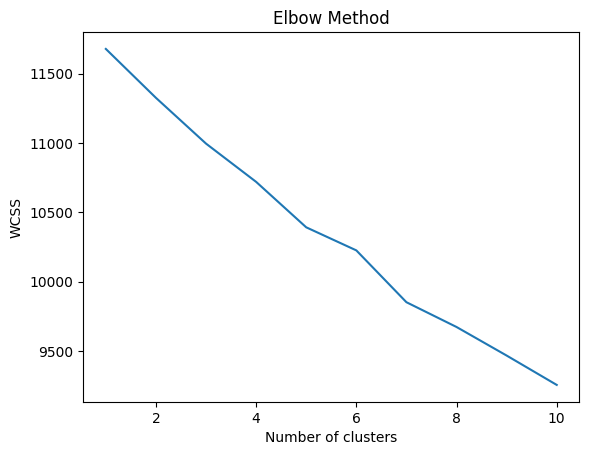

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
# df = pd.read_csv('your_dataset.csv')

# Columns to be used for text analysis
columns_to_preprocess = ['category', 'details', 'product_title']

# Text preprocessing function
def preprocess_text(text):
    # Tokenization: Split text into words
    words = nltk.word_tokenize(text)
    
    # Lowercasing: Convert words to lowercase
    words = [word.lower() for word in words]
    
    # Removing stopwords: Remove common words that don't carry much information
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming: Reduce words to their root form (using Porter stemmer)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join the preprocessed words back into a sentence
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

# Apply the preprocessing function to the specified columns
for column in columns_to_preprocess:
    df[column + '_preprocessed'] = df[column].apply(preprocess_text)

# Specify the column with preprocessed text data for clustering
text_column = 'product_title_preprocessed'  # Adjust this based on the column you want to cluster

# TF-IDF vectorization of the preprocessed text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])

# Determine the optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (Elbow method)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
n_clusters = 5  # Adjust this based on the plot

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Now, your preprocessed text data is clustered based on TF-IDF representations


In [10]:
wcss

[11678.509082950235,
 11325.900526835056,
 10995.769689146722,
 10719.964803348597,
 10392.207084467313,
 10225.874008222048,
 9852.172834054243,
 9673.539459229185,
 9467.607198514681,
 9255.86847895158]

In [6]:

# Select the relevant features for clustering
X = df[['category', 'details', 'product_title']]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (Elbow method)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this based on the plot

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
df['cluster'] = cluster_labels

# Now, you have clustered products into groups based on their attributes


ValueError: could not convert string to float: 'Watches'